<a href="https://colab.research.google.com/github/jspinaj/Computer-Vision/blob/main/Pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Jupyter Notebook


In [ ]:
# Setup 
#pip uninstall opencv-python
# pip install opencv-contrib-python
import imageio
import numpy as np
import random
import pandas as pd
import os
from math import log10, copysign

import cv2
import matplotlib
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

import extraerROI as roi

In [ ]:
img_filename="data/traffic_signs/Flecha_Derecha/Flechader4.jpg"

imagenROI,ima_umbralizada,var,ima_prueba= roi.extraccion_ROI(img_filename,"v")
    
filename = "data/my_gif.GIF"
#imageio.mimsave(filename, ima_prueba,fps=2)
#img_plot(img_og,img_processed,img_BW,filename_out)

for k in range(len(ima_umbralizada)):
    print(ima_umbralizada[k])

print(ima_umbralizada)



#print(ima_umbralizada.size()) 
plt.imshow(imagenROI)


In [ ]:
# image ingest

image_list = open("data/traffic_filename_list.txt", "r")  
data=[]
properties=[]
random.seed(10)

for img_filename in image_list:

    img_filename=img_filename.replace("\n","")  
    words = img_filename.split("/")
    img_category=words[2]
    if True: #img_category=='Pare' :
        #print(img_filename)
        imagenROI,ima_umbralizada,properties,ima_prueba= roi.extraccion_ROI(img_filename,img_category)
        #plt.imshow(imagenROI)
        

       
        #ilename_out="data/output/"+words[3]
        filename_out= "G:/Unidades compartidas/TIA 2021-II/Imagenes/output/"+words[3]
        #cv2.imwrite(filename_out,cv2.cvtColor(imagenROI,cv2.COLOR_RGB2BGR))

        for k in range(len(ima_umbralizada)):
            filename_segment= "G:/Unidades compartidas/TIA 2021-II/Imagenes/output/segments/"+img_category+"_"+str(k)+"_"+words[3]
            cv2.imwrite(filename_segment,cv2.cvtColor(ima_umbralizada[k],cv2.COLOR_RGB2BGR))
            print(filename_segment)

        data+=properties


# images properties dataframe
col_names=['img_filename','category','long_arc','redon','rel','Hu0','Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','i']
col_features=col_names[1:-2]
df=pd.DataFrame(data, columns = col_names)

csv_filename="data/properties.csv"
df.to_csv(csv_filename)             # guardar datos a archivo csv



#print(df2)

In [ ]:
csv_filename="data/properties.csv"

col_features=col_names[2:-2]
df=pd.DataFrame(data, columns = col_names)

ima_gris=imagenROI[:][:][1]
ret,th1 = cv2.threshold(ima_gris,100,255,cv2.THRESH_BINARY)
moments = cv2.moments(th1)
huMoments = cv2.HuMoments(moments).flatten()
print(type(huMoments))

for i in range(0,7):
    huMoments[i] = -1* copysign(1.0, huMoments[i]) * log10(abs(huMoments[i]))
  
#huMoments=huMoments.transpose()    
huMoments=huMoments.tolist()
print(huMoments)

var2=huMoments+[1,4,3]
print(df.shape)
print(col_features)
#print(features)

df.groupby(['category']).size()


In [13]:
# Properties Analysis
col_names=['img_filename','category','long_arc','redon','rel','Hu0','Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','i']
col_features=col_names[2:-1]

csv_filename="data/properties.csv"
df=pd.read_csv(csv_filename )      # leer archivo csv para probar


df = df[df['category'] != "ruido"]      # eliminar ruidos

features=df[col_features]          # separando las propiedades del dataframe
corr_coef = features.corr()                     # coeficiente estadistico

mu=features.mean()                              # media de cada propiedad
sigma=features.var()                            # vector de varianzas  

#print(corr_coef)

# Normalization 
features=(features-mu)/sigma

# Perform PCA analysis
# dos formas de hacer PCA
#LAD
pca = PCA(n_components=3)       # 1. definiendo cantidad de componentes
#pca=PCA(0.8)                                    # 2. por grado semejanza
pca.fit(features)                               # aplicación 
print(pca.components_)
print("explained_varianc_ratio " + str(pca.explained_variance_ratio_))

reduced_features=pca.transform(features)     

df['pca1']=reduced_features[:,0]

df['pca2']=reduced_features[:,1]
#print(reduced_features[:,1])
#print(reduced_features)


[[ 2.00862567e-05 -9.90138890e-01  1.40021552e-01  3.94106557e-03
   1.62297314e-03  7.68696646e-05  8.48003546e-04  1.11506235e-04
  -1.97315352e-04 -3.05214019e-05]
 [-6.26238952e-05  1.39924808e-01  9.89994756e-01 -1.38957667e-02
  -9.86306924e-03 -3.54772112e-03 -5.26257915e-03  2.73085729e-05
   4.02085705e-04  7.81635454e-04]
 [-5.50652179e-04 -6.65271168e-03 -1.67390063e-02 -8.95971740e-01
  -3.19370498e-01 -2.27599333e-01 -2.07609130e-01  1.44912215e-03
   2.16105155e-03  1.61048913e-03]]
explained_varianc_ratio [0.91298051 0.08498501 0.00200576]


In [ ]:
col_names=['img_filename','category','long_arc','redon','rel','Hu0','Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','i']
col_features=col_names[2:-1]
print(col_features)

11


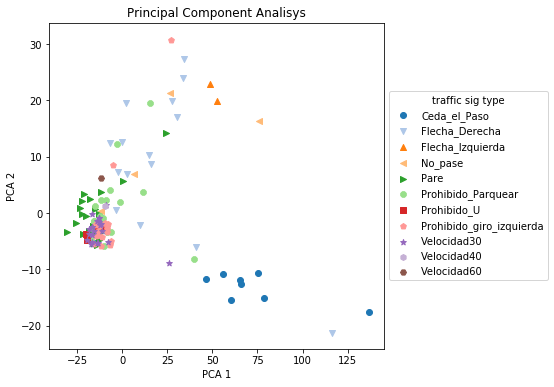

In [18]:
# Plot
categories=[]

fig, ax = plt.subplots(figsize=(6, 6))
# "tab10" "tab20" "Pastel2" "Dark2" "Set3"
style= "tab20"
cmap = matplotlib.cm.get_cmap(style)
marker=['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
t=0
for ct,dfC in  df.groupby('category'):
    scatter=plt.scatter(dfC.pca1, dfC.pca2, color=cmap(t),marker=marker[t])
    categories.append(ct)
    t=t+1

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Principal Component Analisys')
print(len(categories))
ax.legend(categories,loc='center left', bbox_to_anchor=(1, 0.5),title='traffic sig type')


#plt.show()


In [202]:
idx= np.random.randint(0,2,features.shape[0])

trainData=features[idx==0].astype(np.float32)
newcomer=features[idx!=0].astype(np.float32)
responses=pd.Categorical(df.category).codes
responses=responses[idx==0].astype(np.float32)

print(idx)
print(responses)


[0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0]
[ 0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  3.  3.  3.  3.  3.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  6.  6.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  9. 10.]


In [210]:
idx= np.random.randint(0,2,features.shape[0])


all_responses=pd.Categorical(df.category).codes
all_responses = np.random.randint(0,10,(features.shape[0],1)).astype(np.float32)
all_data=features.to_numpy().astype(np.float32)

trainData=all_data[idx==0]
responses=all_responses[idx==0]
#.astype(np.int32)

newcomer=all_data[idx!=0]
check_responses=all_responses[idx!=0].astype(np.float32)

#print(type(trainData))
#print(type(responses))

#print(trainData.shape)
#print(responses.shape)

knn = cv2.ml.KNearest_create()

knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)

ret, results, neighbours, dist = knn.findNearest(newcomer, 3)


#print ("results: ", results,"\n")
#print ("neighbours: ", neighbours,"\n")
#print ("distances: ", dist)
print( np. concatenate((results, check_responses), axis=1))

[[0. 1.]
 [6. 6.]
 [0. 0.]
 [2. 2.]
 [0. 4.]
 [0. 5.]
 [3. 8.]
 [5. 7.]
 [5. 2.]
 [5. 4.]
 [0. 1.]
 [0. 7.]
 [3. 6.]
 [3. 3.]
 [4. 5.]
 [0. 1.]
 [2. 3.]
 [5. 7.]
 [4. 4.]
 [9. 1.]
 [1. 3.]
 [1. 1.]
 [0. 1.]
 [9. 5.]
 [6. 2.]
 [1. 3.]
 [9. 6.]
 [3. 6.]
 [1. 1.]
 [1. 9.]
 [6. 7.]
 [0. 8.]
 [6. 9.]
 [0. 6.]
 [1. 0.]
 [0. 8.]
 [5. 8.]
 [1. 8.]
 [0. 6.]
 [7. 5.]
 [0. 1.]
 [1. 3.]
 [5. 1.]
 [4. 8.]
 [1. 1.]
 [6. 5.]
 [5. 8.]
 [2. 1.]
 [1. 8.]
 [1. 0.]
 [7. 7.]
 [0. 9.]
 [0. 4.]
 [4. 3.]
 [1. 3.]
 [4. 0.]
 [6. 6.]
 [5. 0.]]


In [177]:
print(features.shape[0])

125


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


True

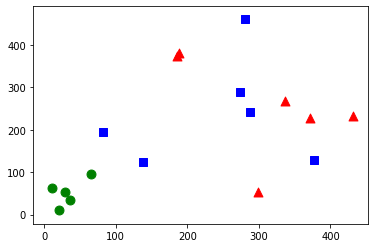

In [196]:

trainData = np.random.randint(0,500,(51,10)).astype(np.float32)
responses = np.random.randint(0,10,(51,1)).astype(np.float32)

red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')


newcomer = np.random.randint(0,100,(5,10)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')


print(type(trainData))
print(type(responses))

knn = cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)


In [ ]:

img_filename="data/Prohibidoparq_ideal.png"

img_ideal=cv2.imread(img_filename) 
img_og=cv2.imread("data/traffic_signs/Prohibido_Parquear/Prohibidoparq13.jpg")

vector_size=15
#alg= cv2.SIFT_create()
alg = cv2.AKAZE_create()

kp1, des1 = alg.detectAndCompute(img_ideal,None)
kp2, des2 = alg.detectAndCompute(img_og,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

print(type(des1))

print(type(des2))

# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
print(matches[1])


list_x = []
list_y = []

# For each match...
for mat in matches:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1, y1) = kp1[img1_idx].pt
    (x2, y2) = kp2[img2_idx].pt

    # Append to each list
    list_x.append(x2)
    list_y.append(y2)



img3 = cv2.drawMatches(img_ideal,kp1,img_og,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#cv2.drawContours(img_og,list_kp2, -1, (0, 255, 0), 3)
start_point = (int(min(list_x)),int(min(list_y)))
end_point = (int(max(list_x)),int(max(list_y)))
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 10
print(start_point)
cv2.rectangle(img_og,start_point, end_point,color,thickness  )
for i in range(len(list_x)):
    cv2.circle(img_og,(int(list_x[i]),int(list_y[i])),60,color,-1)
cv2.imwrite('data/out.jpg',img_og)
plt.imshow(img_og),plt.show()


In [ ]:
img_filename="data/traffic_signs/Prohibido_Parquear/Prohibidoparq29.jpg"
img_og=cv2.imread(img_filename)     #original image





In [ ]:
img_filename="data/traffic_signs/Prohibido_Parquear/Prohibidoparq29.jpg"

words[0]

words[3]


In [ ]:


print(categories)

df_cla = [x for _, x in df.groupby('category')]
print(df)
